In [1]:
!pip install xgboost
!pip install shap
!pip install eli5
!pip install lime
!pip install sklearn
!pip install pdpbox

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("standardised_data.csv")
df.head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1.0,0.0,0.001508,0.090287,0.090032,0.077441,0.256321,0.888663,0.045086,0.852140,...,0.5,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,1.000000,0.087719
1,0.0,0.0,0.002085,0.311736,0.132924,0.271605,0.045016,0.476287,0.043648,0.951929,...,0.0,0.0,0.0,0.166667,0.571429,0.25,0.25,0.2,0.166667,0.684211
2,0.0,0.0,0.000354,0.022472,0.020025,0.023569,0.134897,0.347505,0.046161,0.827335,...,0.5,1.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.166667,0.192982
3,0.0,0.0,0.000816,0.116854,0.078975,0.117845,0.392880,0.297482,0.038820,0.825268,...,0.5,0.0,1.0,1.000000,1.000000,1.00,0.75,0.2,0.666667,0.649123
4,0.0,0.0,0.000623,0.111235,0.101018,0.103255,0.491595,0.466350,0.042604,0.798557,...,0.5,0.0,1.0,0.833333,0.571429,1.00,0.25,0.2,1.000000,0.578947


In [4]:
y = df[['TARGET']]
X = df.drop('TARGET', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [5]:
def model_accuracy (X_test :pd.DataFrame, y_test :pd.DataFrame, model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ",(accuracy * 100.0))

In [6]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
model_accuracy(X_test,y_test,model_XGB)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

In [7]:
model_XGB.save_model('XGBOOST_SHAP.model')

In [8]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model_XGB)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


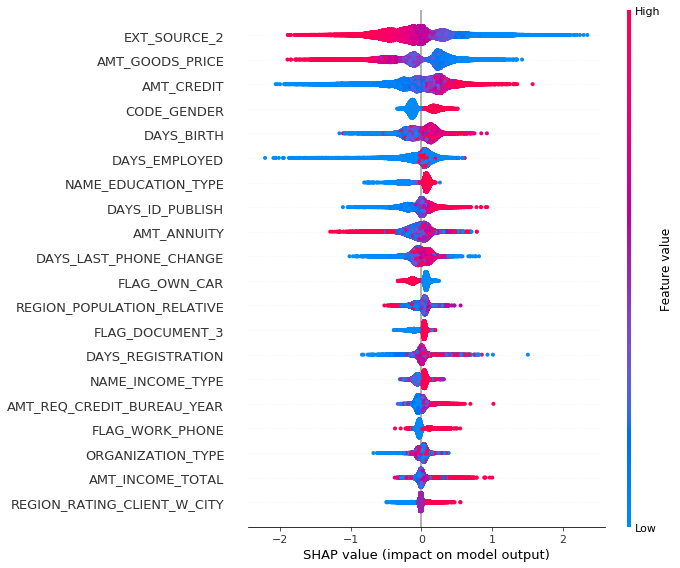

In [9]:
shap.summary_plot(shap_values, X_test)


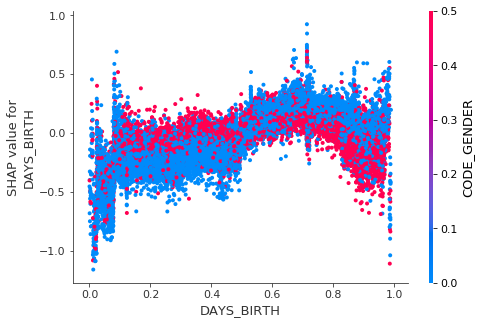

In [10]:
shap.dependence_plot("DAYS_BIRTH",shap_values, X_test)


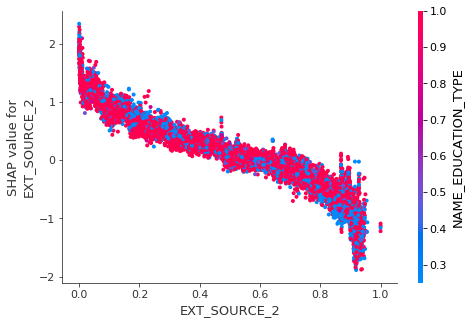

In [11]:
shap.dependence_plot("EXT_SOURCE_2",shap_values, X_test)


In [12]:
# plot the SHAP values for the 10th observation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10,:], X_test.iloc[10,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


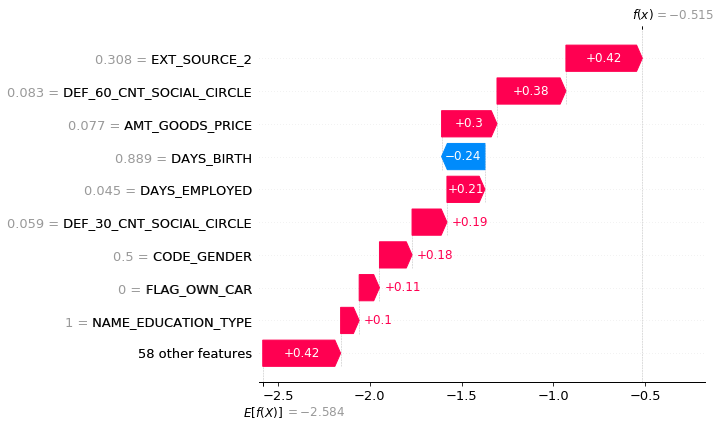

In [13]:
shap.initjs()
shap_values_waterfall = explainer(X[:100])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values_waterfall[0])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5e2ef48b-7703-4677-a8b9-64913d9e5bbb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>